## The yellow pages will be web scraped for hotels in the Austin Tx area. 
---
The following libraries will be used 

In [11]:
import requests as r
import csv
from bs4 import BeautifulSoup
import re 
import pandas as pd

Creating a location to place the CSV file once complete.

In [ ]:
# file path
fp = '/content/gdrive'
filename = 'hotels.csv'

The following is the site where the web scrape will begin

In [ ]:
site = 'https://www.yellowpages.com/search?search_terms=hotel&geo_location_terms=Austin%2C+TX'

Beautiful Soup and requests retrieving the page

In [ ]:
result = r.get(site)

In [ ]:
soup = BeautifulSoup(result.content, 'lxml')

In [ ]:
r.get('https://www.yellowpages.com/search?search_terms=hotel&geo_location_terms=Austin%2C%20TX&page=1')

<Response [200]>

Austin has many pages of hotels on Yellow pages. The following will retrieve a 
list of links (pagination)

In [ ]:
links = []
i=0
for i in range(5):
  links.append(site + '&page=' + str(i+1))




The following block of code will retrieve the hotel name, the address, and the hotel phone number. The data will be appended into empty lists. 

In [ ]:
hotel_name=[]
phone = []
address=[]
city = []
for link in links:
  result = r.get(link)
  soup = BeautifulSoup(result.content,'lxml')
  soup.find_all('a', attrs = {'class': 'business-name'})
  for hotel in soup.find_all('h2'):
    hotel_name.append(hotel.text)
  for num in soup.find_all('div', attrs={'class': 'phones phone primary'}):
    phone.append(num.text)
  for addy in soup.find_all('div', attrs={'class': 'street-address'}):
    address.append(addy.text)
  for info in soup.find_all('div', attrs={'class': 'locality'}):
    city.append(info.text)

As you can see the web scrape returned hotels advertised on the page. These hotels do not have addresses or phone numbers associated with them. This will be a problem. 

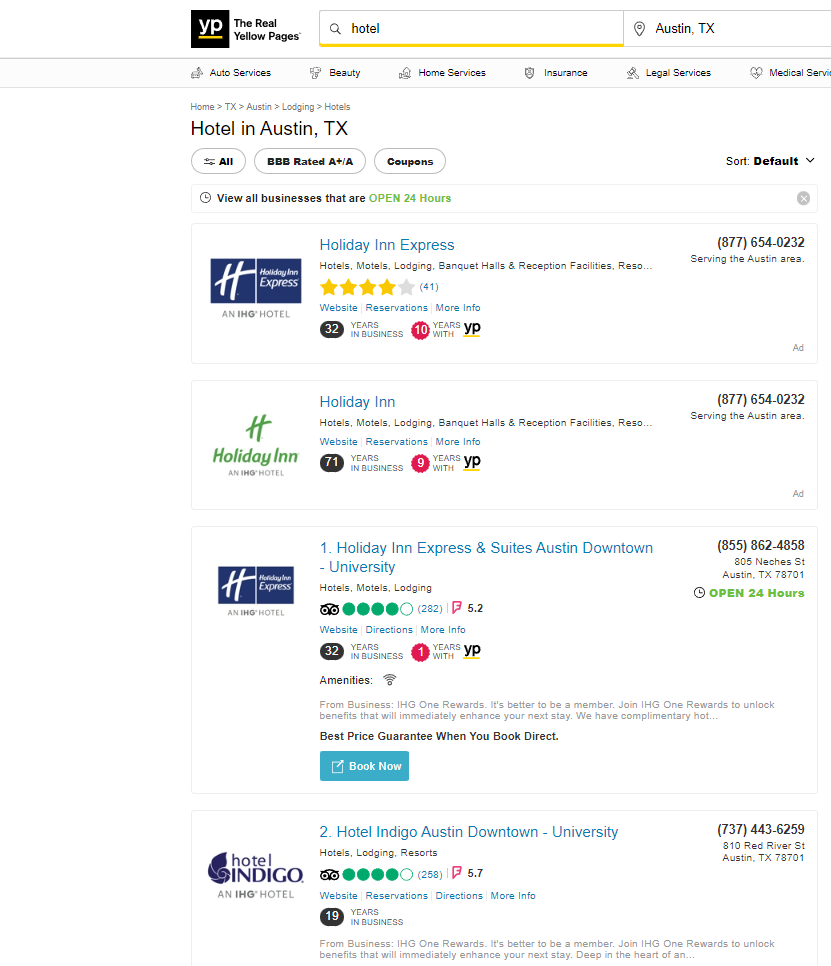

In [ ]:
hotel_name[:10]

['1. Holiday Inn Express & Suites Austin Downtown - University',
 '2. Hotel Indigo Austin Downtown - University',
 '3. Holiday Inn Austin-Town Lake',
 '4. Holiday Inn Austin Midtown',
 '5. Holiday Inn Austin Airport',
 '6. Candlewood Suites Austin Airport',
 '7. Holiday Inn Express & Suites Austin Airport',
 '8. Holiday Inn Express & Suites Austin South',
 '9. Staybridge Suites Austin South Interstate Hwy 35',
 '10. Candlewood Suites Austin North 290 & I-35']

However, the hotels that we would like to web scrape have a similarity amongst eachother... They all begin with numbers because they are ranked. This will be used to remove the hotels that are advertised and lack addresses and phone numbers. The following list 's' contains numbers, however the numbers that are part of our 'hotel_name' list are strings. Nonetheless, our list 's' of numbers will be converted into a list of strings and the name will be changed to 's_strings'.

In [ ]:
s = [1,2,3,4,5,6,7,8,9,0]
s_strings = [str(x)for x in s]

Now, we will go through the 'hotel_name' list pulling each hotel and checking the first letter. If the first letter happens to be a number character then it will be removed from the 'hotel_name' list. 

In [ ]:
for hotel in hotel_name:
  if hotel[0] not in s_strings:
    hotel_name.remove(hotel)

Now, comparing our first 10 items in 'hotel_name' list we see that the hotels without leading numbers have been removed. 

In [ ]:
hotel_name[:10]

['1. Holiday Inn Express & Suites Austin Downtown - University',
 '2. Hotel Indigo Austin Downtown - University',
 '3. Holiday Inn Austin-Town Lake',
 '4. Holiday Inn Austin Midtown',
 '5. Holiday Inn Austin Airport',
 '6. Candlewood Suites Austin Airport',
 '7. Holiday Inn Express & Suites Austin Airport',
 '8. Holiday Inn Express & Suites Austin South',
 '9. Staybridge Suites Austin South Interstate Hwy 35',
 '10. Candlewood Suites Austin North 290 & I-35']

We can see from the following code that all three variables are of the same length. This proves that the advertised hotels, which lacked addresses have been removed. Otherwise, the hotel_name variable would be greater than the other variables. 

In [ ]:
print(len(address))
print(len(hotel_name))
print(len(phone))
print(len(city))


150
150
150
150


Now the final bit of cleaning that will be done is to remove the numbers from the 'hotel_name' list. As we can see again each number has a '.' at the end followed by a space. Therefore we can strip the names following this distinct similarity that all the hotel names have. 

In [ ]:
hotel_name = [i.split('.')[1].strip() for i in hotel_name]


In [ ]:
city[:10]

['Austin, TX 78701',
 'Austin, TX 78701',
 'Austin, TX 78701',
 'Austin, TX 78752',
 'Austin, TX 78741',
 'Austin, TX 78741',
 'Austin, TX 78741',
 'Austin, TX 78745',
 'Austin, TX 78745',
 'Austin, TX 78754']

In [ ]:
city1=city # This copy made so that the website did not have to be hit again.

City now has too much information. It includes the city name, the state and the zip code. These will be split into three different variables: city, state, zipcode

In [ ]:
city1 = []
state =[]
zipcode=[]
for i in city:
  city1.append(i.split(',')[0])
  state.append(i.split(' ')[1])
  zipcode.append(i.split(' ')[2])

In [ ]:
print(len(city1))
print(len(state))
print(len(zipcode))

150
150
150


In [ ]:
columns = ['hotel_name', 'address', 'city', 'state', 'zipcode', 'phone']
hotels = pd.DataFrame(zip(hotel_name, address, city1, state, zipcode, phone), columns=columns)

Now a data frame has been created with pandas.

In [ ]:
hotels.head()


,hotel_name,address,city,state,zipcode,phone
0,Holiday Inn Express & Suites Austin Downtown -...,805 Neches St,Austin,TX,78701,(855) 862-4858
1,Hotel Indigo Austin Downtown - University,810 Red River St,Austin,TX,78701,(737) 443-6259
2,Holiday Inn Austin-Town Lake,20 N Interstate 35,Austin,TX,78701,(844) 335-0714
3,Holiday Inn Austin Midtown,6000 Middle Fiskville Rd,Austin,TX,78752,(844) 276-6368
4,Holiday Inn Austin Airport,6711 E Ben White Blvd,Austin,TX,78741,(844) 809-4270


In [ ]:
hotels.tail()

,hotel_name,address,city,state,zipcode,phone
145,Summit Hotels,12600 Hill Country Blvd Ste R-100,Austin,TX,78738,(512) 538-2300
146,Uptown Suites Extended Stay Austin TX - Round ...,2006 Grand Avenue Pkwy,Austin,TX,78728,(512) 391-1550
147,La Quinta,1943 Medical Dr,Austin,TX,78734,(512) 263-1300
148,The Driskill - The Unbound Collection by Hyatt,604 Brazos St,Austin,TX,78701,(512) 439-1234
149,The Madison,"307 W 5th St Unit B, Austin TX, 78701",Austin,TX,78701,(512) 494-4094



Finally, print out the data frame into a csv


In [ ]:
hotels.to_csv('hotels.csv')

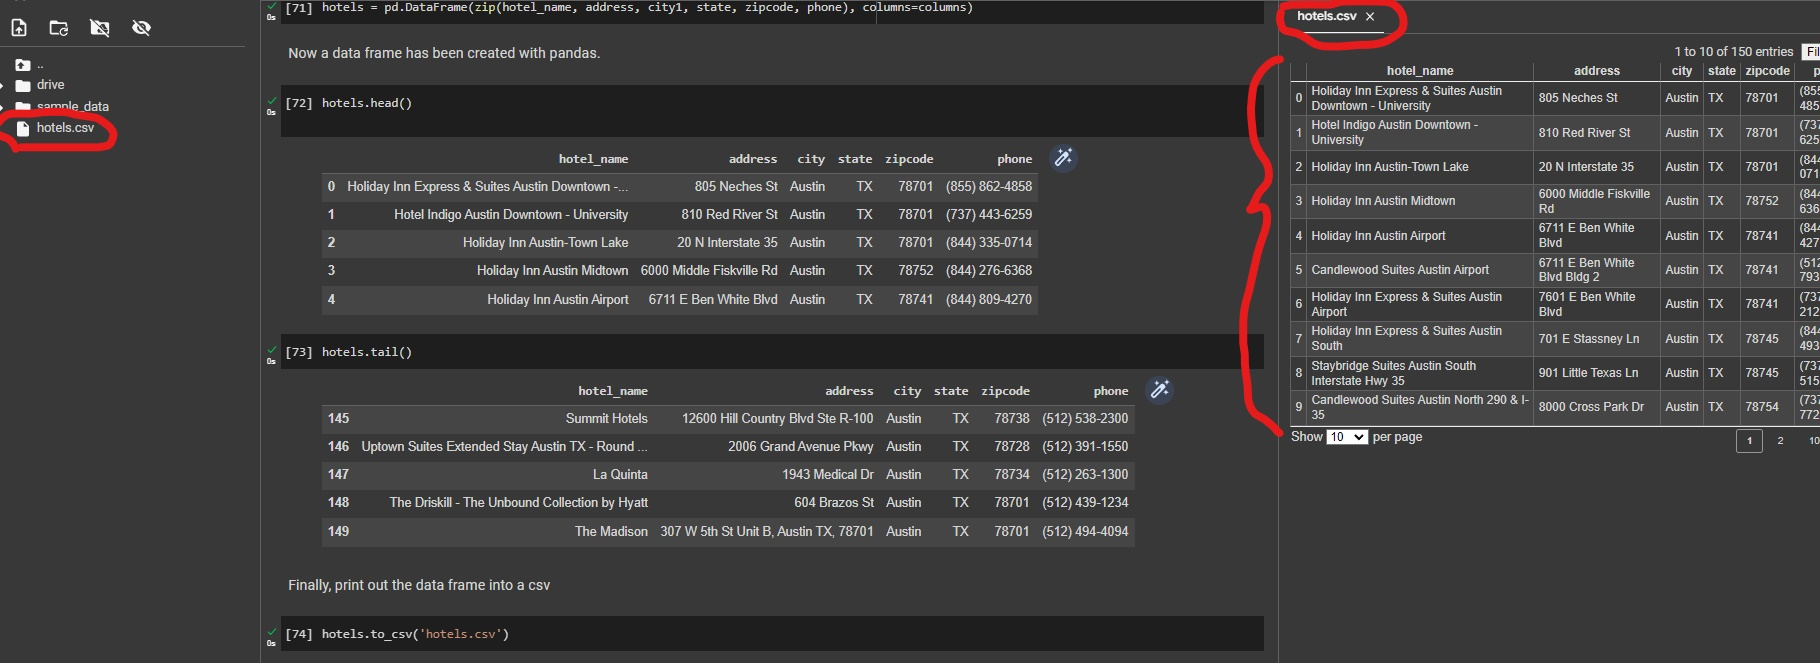

# Adding Geo latitude and longitude 

I will now add the latitude and longitude to the dataframe. I will first add new variables 'lat' and 'lng'. 

In [4]:
hotels['lat'] = str(1)
hotels['lng'] = str(1)

Now the head of the dataframe will be shown to show that the new variables have been created. 

In [5]:
hotels.head()

,Unnamed: 0,hotel_name,address,city,state,zipcode,phone,lat,lng
0,0,Holiday Inn Express & Suites Austin Downtown -...,805 Neches St,Austin,TX,78701,(855) 862-4858,1,1
1,1,Hotel Indigo Austin Downtown - University,810 Red River St,Austin,TX,78701,(737) 443-6259,1,1
2,2,Holiday Inn Austin-Town Lake,20 N Interstate 35,Austin,TX,78701,(844) 335-0714,1,1
3,3,Holiday Inn Austin Midtown,6000 Middle Fiskville Rd,Austin,TX,78752,(844) 276-6368,1,1
4,4,Holiday Inn Austin Airport,6711 E Ben White Blvd,Austin,TX,78741,(844) 809-4270,1,1


The next part requres credentials from mapquestapi. The free tier allows 15,000 transactions. 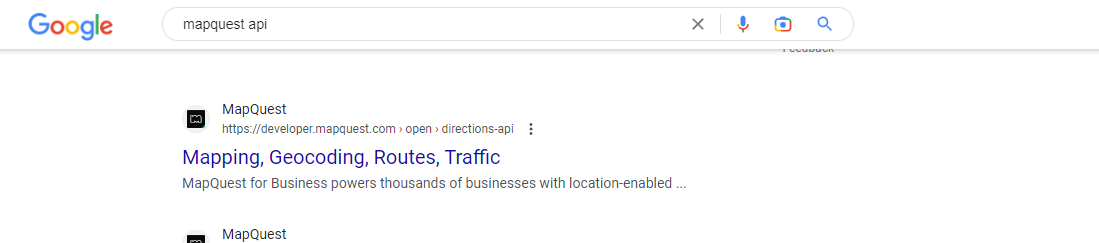

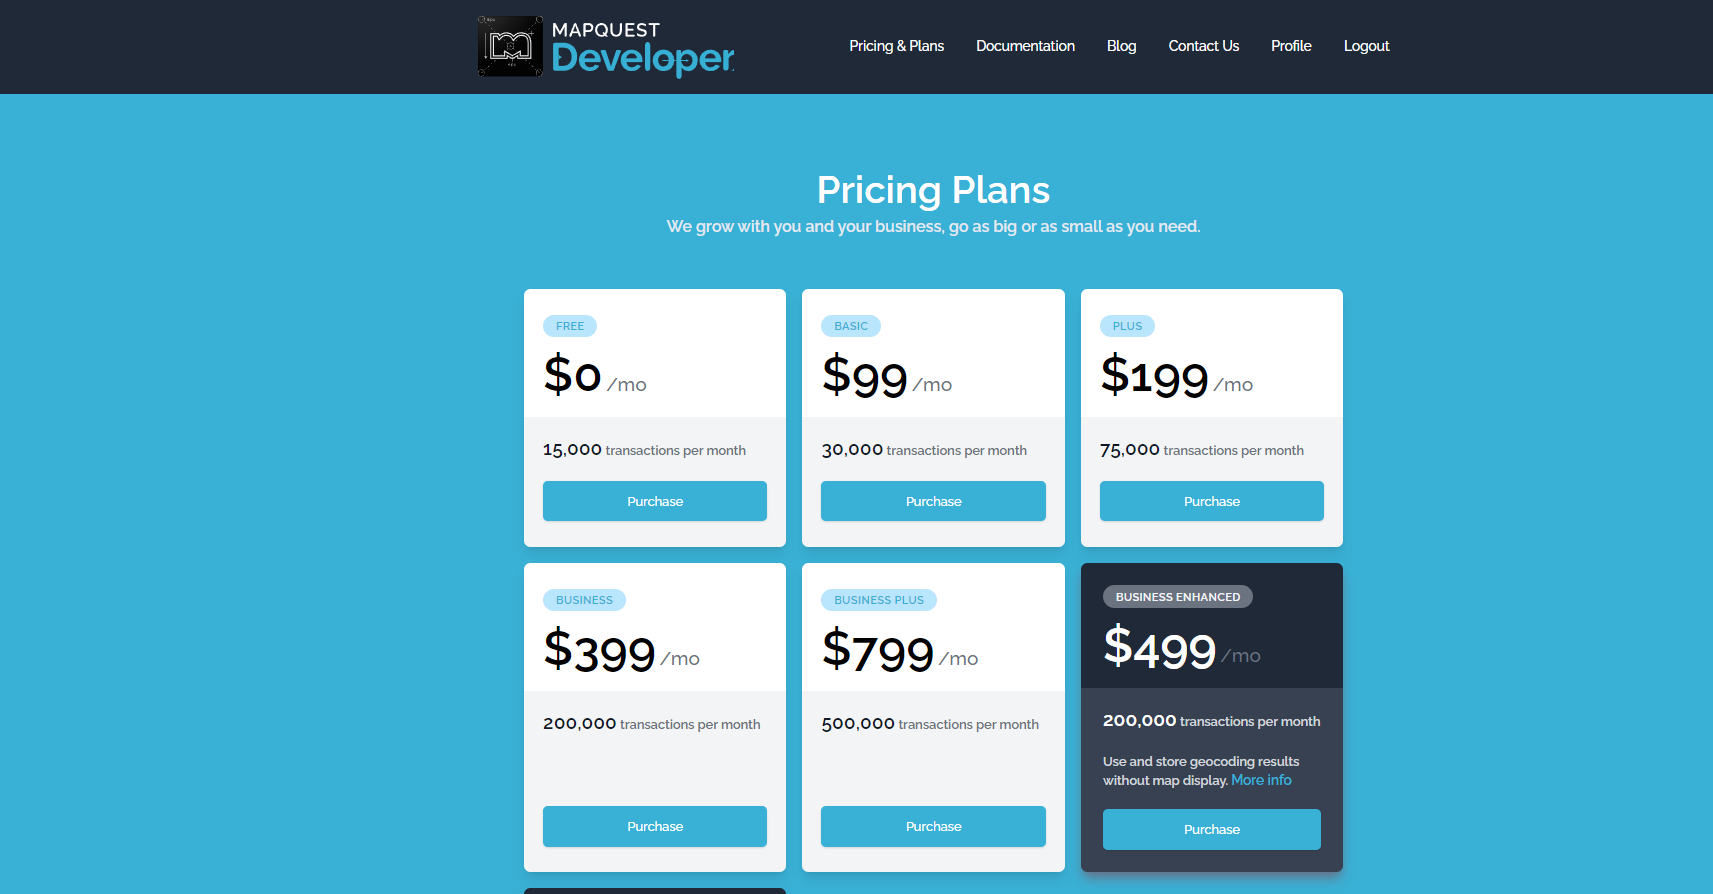

Once an account is created a special key will be created which will be needed to use the api. A for loop will now be used to go through the data frame and add the latitude and longitude from the api. 

Note the 'key' has been hidden for security reasons. 

In [12]:
for index, row in hotels.iterrows():
  api_address = str(hotels.at[index,'address']) + ', ' + str(hotels.at[index, 'zipcode']) + ', ' + str(hotels.at[index,'city']) + ', ' + str(hotels.at[index,'state'])
  parameters ={
    'key' : '***************',
    'location': api_address}
  response = r.get("https://www.mapquestapi.com/geocoding/v1/address", params= parameters)
  data = json.loads(response.text)['results']
  lat = data[0]['locations'][0]['latLng']['lat']
  lng = data[0]['locations'][0]['latLng']['lng']
  hotels.at[index, 'lat'] = lat
  hotels.at[index, 'lng'] = lng

As we can see when the head of the data frame is called the latitude and longitude are now on the data frame. However, a new index column has been created this will be cleaned up and removed. 

In [13]:
hotels.head()

,Unnamed: 0,hotel_name,address,city,state,zipcode,phone,lat,lng
0,0,Holiday Inn Express & Suites Austin Downtown -...,805 Neches St,Austin,TX,78701,(855) 862-4858,30.26931,-97.73732
1,1,Hotel Indigo Austin Downtown - University,810 Red River St,Austin,TX,78701,(737) 443-6259,30.26923,-97.73617
2,2,Holiday Inn Austin-Town Lake,20 N Interstate 35,Austin,TX,78701,(844) 335-0714,30.25396,-97.7369
3,3,Holiday Inn Austin Midtown,6000 Middle Fiskville Rd,Austin,TX,78752,(844) 276-6368,30.32327,-97.71028
4,4,Holiday Inn Austin Airport,6711 E Ben White Blvd,Austin,TX,78741,(844) 809-4270,30.21267,-97.70517


In [14]:
del hotels['Unnamed: 0']

In [15]:
hotels.head()

,hotel_name,address,city,state,zipcode,phone,lat,lng
0,Holiday Inn Express & Suites Austin Downtown -...,805 Neches St,Austin,TX,78701,(855) 862-4858,30.26931,-97.73732
1,Hotel Indigo Austin Downtown - University,810 Red River St,Austin,TX,78701,(737) 443-6259,30.26923,-97.73617
2,Holiday Inn Austin-Town Lake,20 N Interstate 35,Austin,TX,78701,(844) 335-0714,30.25396,-97.7369
3,Holiday Inn Austin Midtown,6000 Middle Fiskville Rd,Austin,TX,78752,(844) 276-6368,30.32327,-97.71028
4,Holiday Inn Austin Airport,6711 E Ben White Blvd,Austin,TX,78741,(844) 809-4270,30.21267,-97.70517


Now the data frame can be saved with the latitude and longitude information. 

In [16]:
hotels.to_csv('hotels_lat_lng.csv')

Using this new hotels data frame and the folium package we can now map the hotels. 

In [18]:
import folium
from folium.plugins import MarkerCluster

In [20]:
map = folium.Map(location=[30.2672, -97.733330], tiles='OpenStreetMap', zoom_start=10)
map

Now, adding the hotels to the map 

In [22]:
locationlist = hotels[['lat', 'lng']].values.tolist()
h_names = hotels['hotel_name'].values.tolist()

In [23]:
for point in range(0,len(hotels)):
  folium.Marker(locationlist[point], popup=h_names[point]).add_to(map)

In [25]:
map

**In this project I showed how to webscrape hotels from the yellow pages clean the data and make it into a data frame. I then showed how to make the data frame into a CSV file. In addition, I showed how to use an API to pull the latitude and longitude data and add it to the data frame. Finally, I used folium to map with markers the hotels onto an interactive map.**